In [1]:
]activate ../../..

 Activating environment at `~/Dropbox/AAHAA/src/OVERT/Project.toml`


In [2]:
include("../../../models/problems.jl")
include("../../../OverApprox/src/overapprox_nd_relational.jl")

┌ Info: For saving to png with the Plotly backend ORCA has to be installed.
└ @ Plots /home/chelsea/.julia/packages/Plots/cc8wh/src/backends.jl:363


floatize (generic function with 1 method)

In [3]:
x²OA_N1 = overapprox_nd(:(x^2), Dict(:x => [-1., 2]), N=1, ϵ=0.)

OverApproximation(:v_3, [-1.9999999999744067, 4.0], Dict(:v_3 => [-1.9999999999744067, 4.0],:v_1 => [0.25, 4.0],:v_2 => [-1.9999999999744067, 4.0],:x => [-1.0, 2.0]), 0, Symbol[], Expr[:(v_1 == 1.0 * max(0, -0.6666666666666666 * (x - 0.5)) + 0.25 * max(0, min(0.6666666666666666 * (x - -1.0), -0.6666666666666666 * (x - 2.0))) + 4.0 * max(0, 0.6666666666666666 * (x - 0.5))), :(v_2 == 1.0 * max(0, -0.6666666666666666 * (x - 0.5)) + -1.9999999999744067 * max(0, min(0.6666666666666666 * (x - -1.0), -0.6666666666666666 * (x - 2.0))) + 4.0 * max(0, 0.6666666666666666 * (x - 0.5)))], Expr[:(v_2 ≦ v_3), :(v_3 ≦ v_1)], Dict{Symbol,Any}(:v_3 => :(x ^ 2)), 1, 0.0)

In [4]:
x²OA_N2 = overapprox_nd(:(x^2), Dict(:x => [-1., 2]), N=2, ϵ=0.)

OverApproximation(:v_6, [-0.49999999998981304, 4.0], Dict(:v_5 => [-0.49999999998981304, 4.0],:v_6 => [-0.49999999998981304, 4.0],:v_4 => [0.0, 4.0],:x => [-1.0, 2.0]), 0, Symbol[], Expr[:(v_4 == 1.0 * max(0, -1.0 * (x - 0.0)) + 0.0 * max(0, min(1.0 * (x - -1.0), -1.0 * (x - 1.0))) + 1.0 * max(0, min(1.0 * (x - 0.0), -1.0 * (x - 2.0))) + 4.0 * max(0, 1.0 * (x - 1.0))), :(v_5 == 1.0 * max(0, -1.3333333333310136 * (x - -0.24999999999869518)) + -0.49999999998981304 * max(0, min(1.3333333333310136 * (x - -1.0), -0.6666666666723541 * (x - 1.249999999988508))) + 0.9999999999769531 * max(0, min(0.6666666666723541 * (x - -0.24999999999869518), -1.3333333333129032 * (x - 2.0))) + 4.0 * max(0, 1.3333333333129032 * (x - 1.249999999988508)))], Expr[:(v_5 ≦ v_6), :(v_6 ≦ v_4)], Dict{Symbol,Any}(:v_6 => :(x ^ 2)), 2, 0.0)

In [5]:
x²OA_N3 = overapprox_nd(:(x^2), Dict(:x => [-1., 2]), N=3, ϵ=0.)

OverApproximation(:v_9, [-1.0014933326968538e-11, 4.0], Dict(:v_9 => [-1.0014933326968538e-11, 4.0],:v_7 => [0.0625, 4.0],:v_8 => [-1.0014933326968538e-11, 4.0],:x => [-1.0, 2.0]), 0, Symbol[], Expr[:(v_7 == 1.0 * max(0, -1.3333333333333333 * (x - -0.25)) + 0.0625 * max(0, min(1.3333333333333333 * (x - -1.0), -1.3333333333333333 * (x - 0.5))) + 0.25 * max(0, min(1.3333333333333333 * (x - -0.25), -1.3333333333333333 * (x - 1.25))) + 1.5625 * max(0, min(1.3333333333333333 * (x - 0.5), -1.3333333333333333 * (x - 2.0))) + 4.0 * max(0, 1.3333333333333333 * (x - 1.25))), :(v_8 == 1.0 * max(0, -1.999999999962908 * (x - -0.499999999990727)) + -1.0014933326968538e-11 * max(0, min(1.999999999962908 * (x - -1.0), -0.9999999999985163 * (x - 0.5000000000107568))) + 1.0014933327169136e-11 * max(0, min(0.9999999999985163 * (x - -0.499999999990727), -1.000000000013539 * (x - 1.499999999997218))) + 1.9999999999956681 * max(0, min(1.000000000013539 * (x - 0.5000000000107568), -1.999999999988872 * (x - 2

In [6]:
@generated function xsqUB_N1(x)
    return x²OA_N1.approx_eq[1].args[3]
end
@generated function xsqUB_N2(x)
    return x²OA_N2.approx_eq[1].args[3]
end
@generated function xsqUB_N3(x)
    return x²OA_N3.approx_eq[1].args[3]
end

xsqUB_N3 (generic function with 1 method)

In [7]:
using PGFPlots

In [40]:
xpts = range(-1,2, length=100)

-1.0:0.030303030303030304:2.0

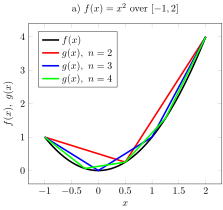

In [41]:
a = PGFPlots.Axis([
        PGFPlots.Linear(xpts, xpts.^2, style="solid, ultra thick, black, mark=none", legendentry="\$f(x)\$"),
        PGFPlots.Linear(xpts, xsqUB_N1.(xpts), style="solid, ultra thick, red, mark=none", legendentry="\$g(x),~n=2\$"),
        PGFPlots.Linear(xpts, xsqUB_N2.(xpts), style="solid, ultra thick, blue, mark=none", legendentry="\$g(x),~n=3\$"),
        PGFPlots.Linear(xpts, xsqUB_N3.(xpts), style="solid, ultra thick, green, mark=none", legendentry="\$g(x),~n=4\$"),
        ], ylabel="\$f(x),~g(x)\$", xlabel="\$x\$", title="a) \$f(x) = x^2\$ over \$[-1,2]\$")
a.legendStyle = "at={(0.05,.95)}, anchor=north west"
display(a)

In [17]:
cosOA_N1 = overapprox_nd(:(cos(x)), Dict(:x => [-π/3., π/2]), N=1, ϵ=0.)
cosOA_N2 = overapprox_nd(:(cos(x)), Dict(:x => [-π/3., π/2]), N=2, ϵ=0.)
cosOA_N3 = overapprox_nd(:(cos(x)), Dict(:x => [-π/3., π/2]), N=3, ϵ=0.)

OverApproximation(:v_18, [6.123233995736766e-17, 1.0574967011590133], Dict(:v_16 => [6.123233995736766e-17, 1.0574967011590133],:v_17 => [6.123233995736766e-17, 0.9841601843797196],:v_18 => [6.123233995736766e-17, 1.0574967011590133],:x => [-1.0471975511965976, 1.5707963267948966]), 0, Symbol[], Expr[:(v_16 == 0.5000000000000001 * max(0, -2.2519279835225414 * (x - -0.6031336169513442)) + 0.8845706479566587 * max(0, min(2.2519279835225414 * (x - -1.0471975511965976), -1.381762160965092 * (x - 0.12057993394047481))) + 1.0574967011590133 * max(0, min(1.381762160965092 * (x - -0.6031336169513442), -1.3390211532172047 * (x - 0.8673941254843096))) + 0.7034022013031055 * max(0, min(1.3390211532172047 * (x - 0.12057993394047481), -1.4216617436465064 * (x - 1.5707963267948966))) + 6.123233995736766e-17 * max(0, 1.4216617436465064 * (x - 0.8673941254843096))), :(v_17 == 0.5000000000000001 * max(0, -1.5600037205436748 * (x - -0.40617343899031944)) + 0.9186394075124305 * max(0, min(1.5600037205436

In [18]:
@generated function cosUB_N1(x)
    return cosOA_N1.approx_eq[1].args[3]
end
@generated function cosUB_N2(x)
    return cosOA_N2.approx_eq[1].args[3]
end
@generated function cosUB_N3(x)
    return cosOA_N3.approx_eq[1].args[3]
end

cosUB_N3 (generic function with 1 method)

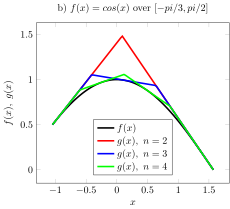

In [51]:
xpts = range(-π/3,π/2, length=100)
a2 = PGFPlots.Axis([
        PGFPlots.Linear(xpts, cos.(xpts), style="solid, ultra thick, black, mark=none", legendentry="\$f(x)\$"),
        PGFPlots.Linear(xpts, cosUB_N1.(xpts), style="solid, ultra thick, red, mark=none", legendentry="\$g(x),~n=2\$"),
        PGFPlots.Linear(xpts, cosUB_N2.(xpts), style="solid, ultra thick, blue, mark=none", legendentry="\$g(x),~n=3\$"),
        PGFPlots.Linear(xpts, cosUB_N3.(xpts), style="solid, ultra thick, green, mark=none", legendentry="\$g(x),~n=4\$"),
        ], ylabel="\$f(x),~g(x)\$", 
        xlabel="\$x\$", 
        title="b) \$f(x) = cos(x)\$ over \$[- pi /3 ,pi/2 ]\$")
a2.legendStyle = "at={(0.5,.05)}, anchor=south"
display(a2)

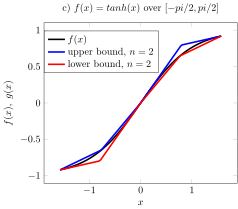

In [54]:
tanhOA_N1 = overapprox_nd(:(tanh(x)), Dict(:x => [-π/2, π/2]), N=1, ϵ=0.)

@generated function tanhUB_N1(x)
    return tanhOA_N1.approx_eq[1].args[3]
end
@generated function tanhLB_N1(x)
    return tanhOA_N1.approx_eq[2].args[3]
end

xpts = range(-π/2, π/2, length=100)
a3 = PGFPlots.Axis([
        PGFPlots.Linear(xpts, tanh.(xpts), style="solid, ultra thick, black, mark=none", legendentry="\$f(x)\$"),
        PGFPlots.Linear(xpts, tanhUB_N1.(xpts), style="solid, ultra thick, blue, mark=none", legendentry="upper bound, \$n=2\$"),
        PGFPlots.Linear(xpts, tanhLB_N1.(xpts), style="solid, ultra thick, red, mark=none", legendentry="lower bound, \$n=2\$"),
        ], ylabel="\$f(x),~g(x)\$", xlabel="\$x\$", title="c) \$f(x) = tanh(x)\$ over \$[- pi /2 ,pi/2 ]\$")
a3.legendStyle = "at={(0.00,.95)}, anchor=north west"
display(a3)


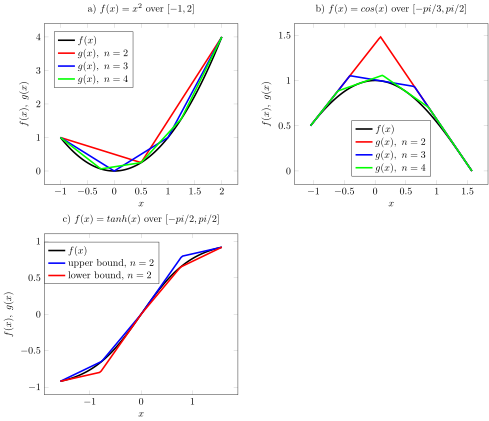

In [56]:
g = GroupPlot(2,2, groupStyle="horizontal sep=2cm, vertical sep=1.75cm")
push!(g, a)
push!(g, a2)
push!(g, a3)
display(g)

In [57]:
save("bound_example.tex", g, include_preamble=false)

In [58]:
# UB equation for closed form example section
tanhOA_N1.approx_eq[1].args[3]

:(-0.9171523356672744 * max(0, -1.24381557588518 * (x - -0.7668186154783817)) + -0.6450757227359059 * max(0, min(1.24381557588518 * (x - -1.5707963267948966), -1.304089363266367 * (x - 0.0))) + 0.0 * max(0, min(1.304089363266367 * (x - -0.7668186154783817), -1.2598749193762386 * (x - 0.7937295874538862))) + 0.7937295874441845 * max(0, min(1.2598749193762386 * (x - 0.0), -1.2868907512989782 * (x - 1.5707963267948966))) + 0.9171523356672744 * max(0, 1.2868907512989782 * (x - 0.7937295874538862)))

In [59]:
# LB expression for closed form example section
tanhOA_N1.approx_eq[2].args[3]

:(-0.9171523356672744 * max(0, -1.2868907512989782 * (x - -0.7937295874538862)) + -0.7937295874441845 * max(0, min(1.2868907512989782 * (x - -1.5707963267948966), -1.2598749193762386 * (x - 0.0))) + 0.0 * max(0, min(1.2598749193762386 * (x - -0.7937295874538862), -1.304089363266367 * (x - 0.7668186154783817))) + 0.6450757227359059 * max(0, min(1.304089363266367 * (x - 0.0), -1.24381557588518 * (x - 1.5707963267948966))) + 0.9171523356672744 * max(0, 1.24381557588518 * (x - 0.7668186154783817)))